1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


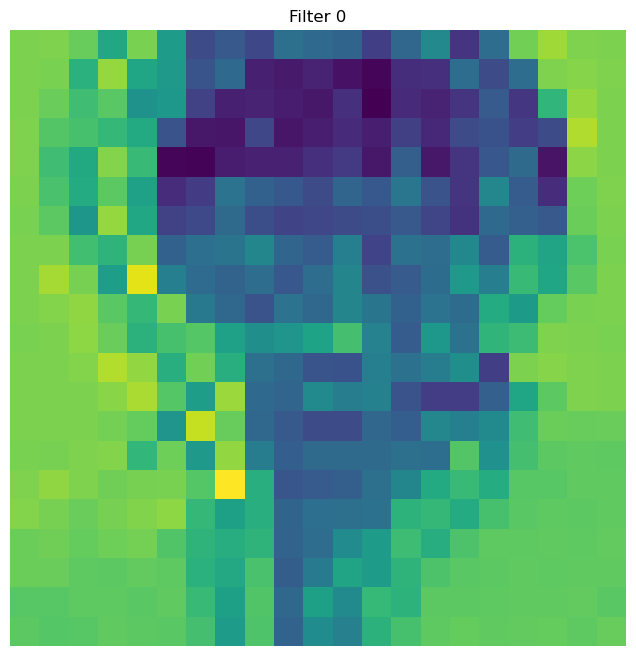

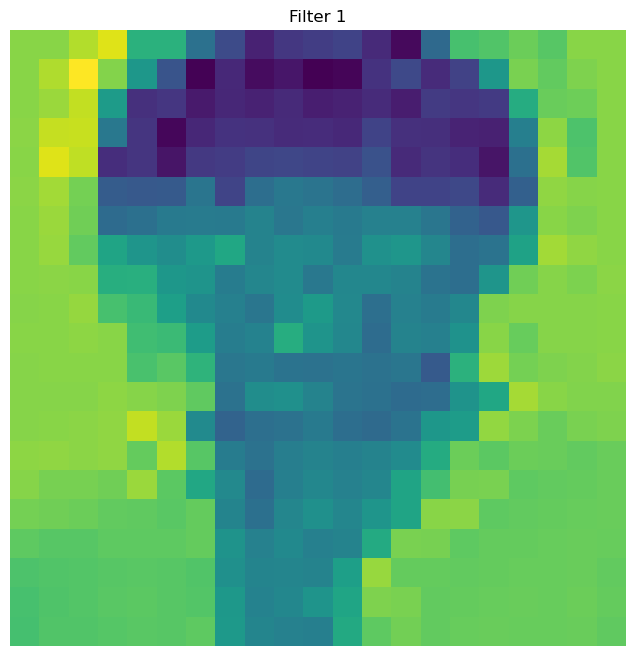

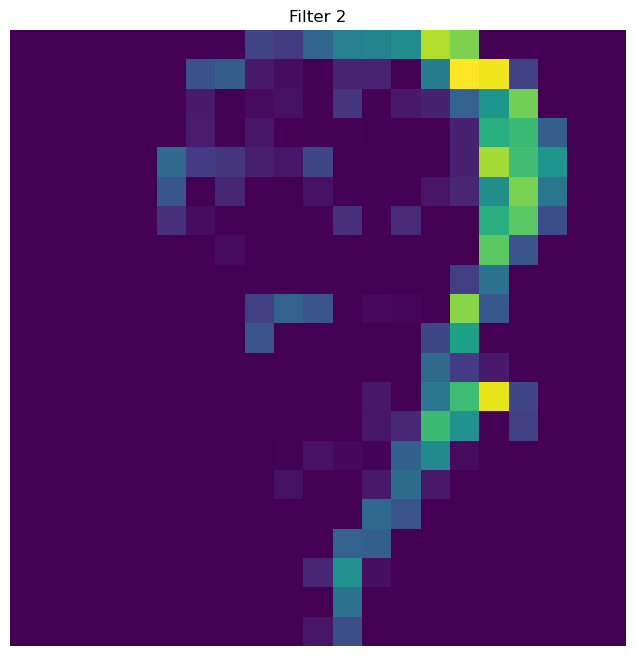

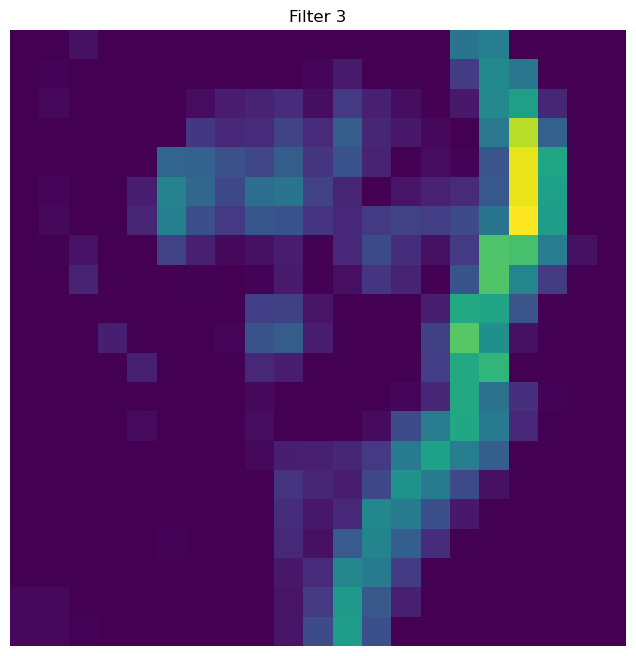

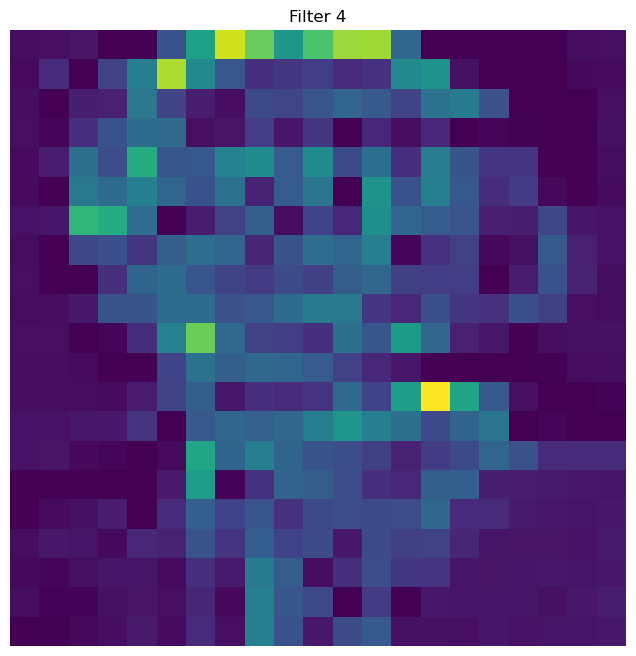

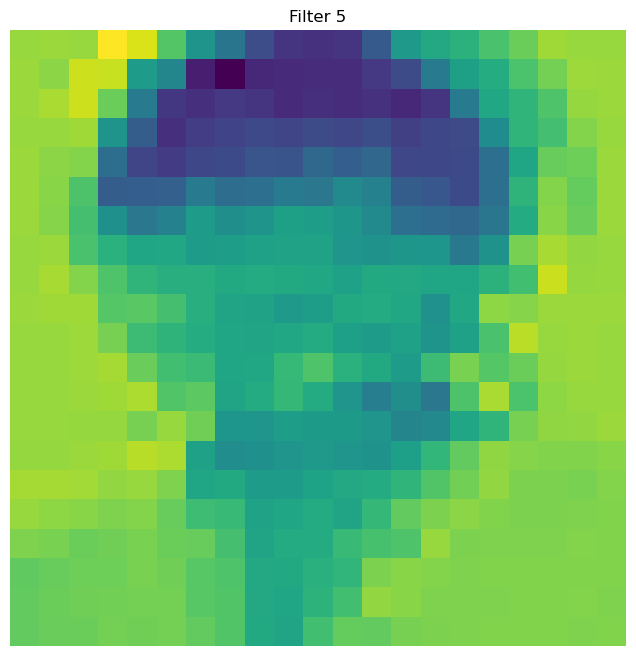

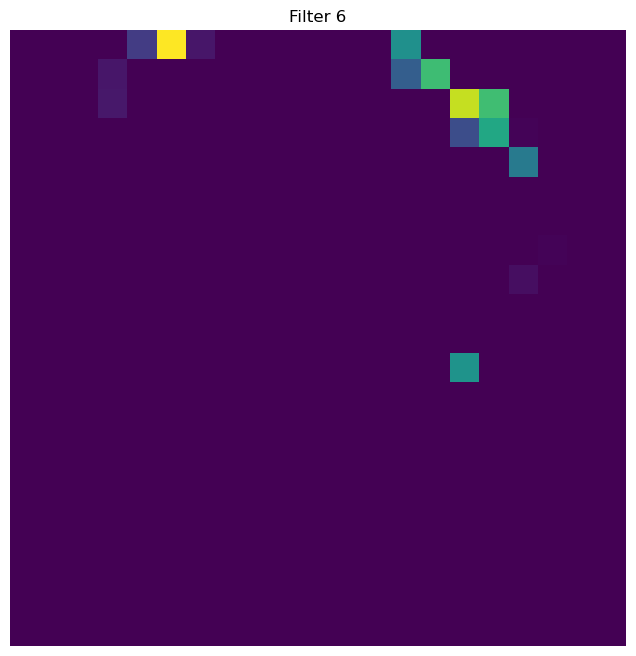

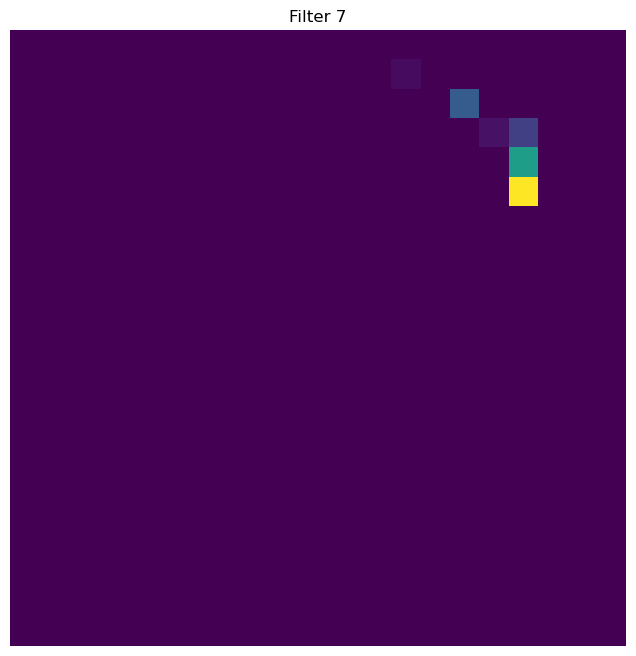

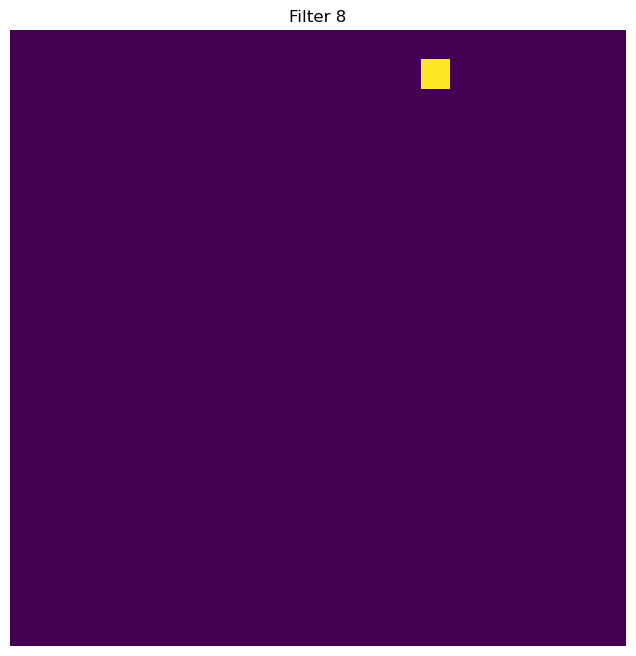

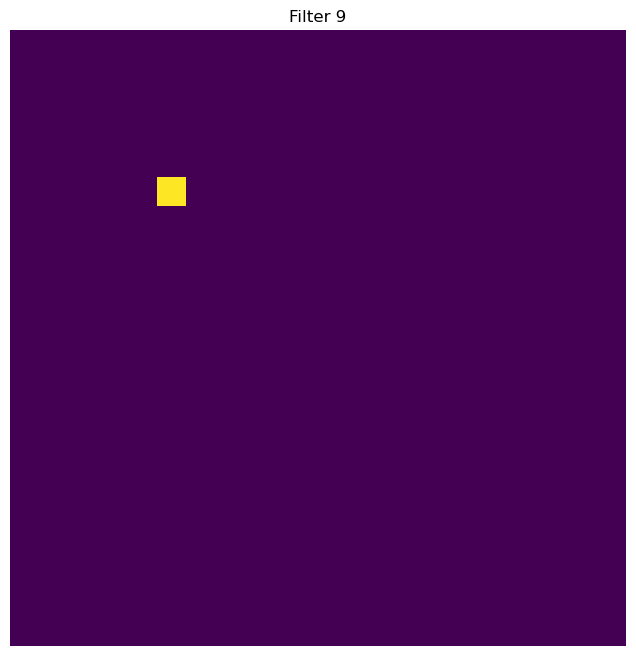

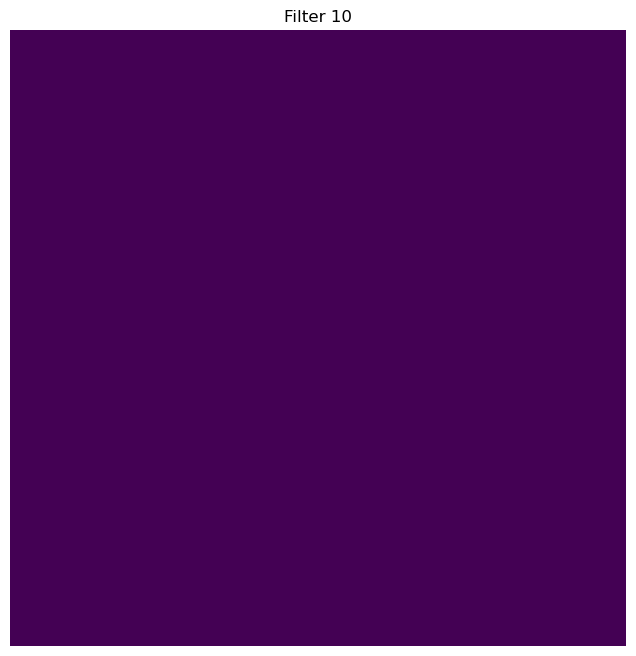

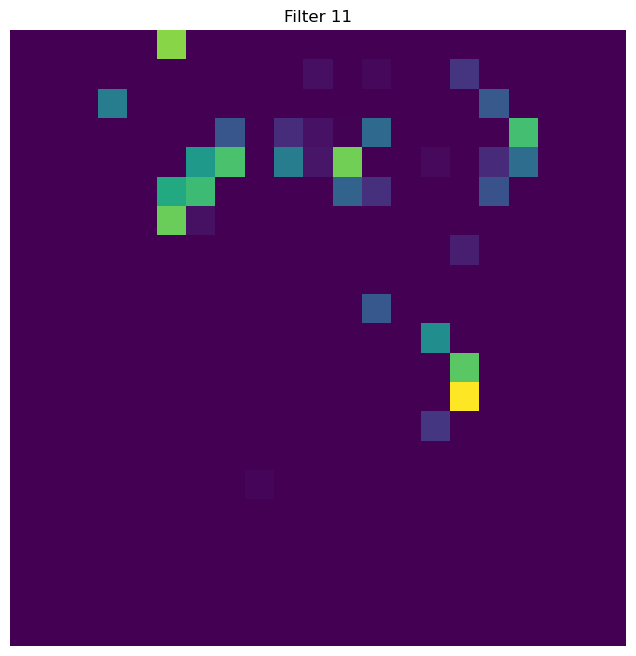

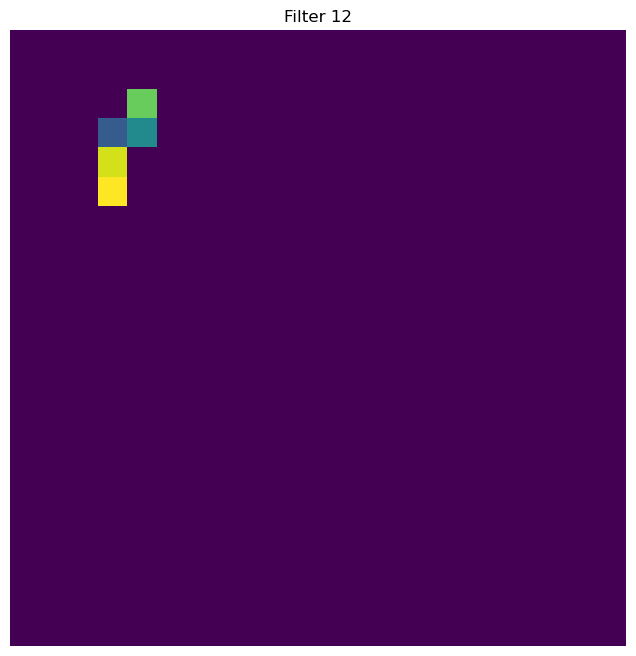

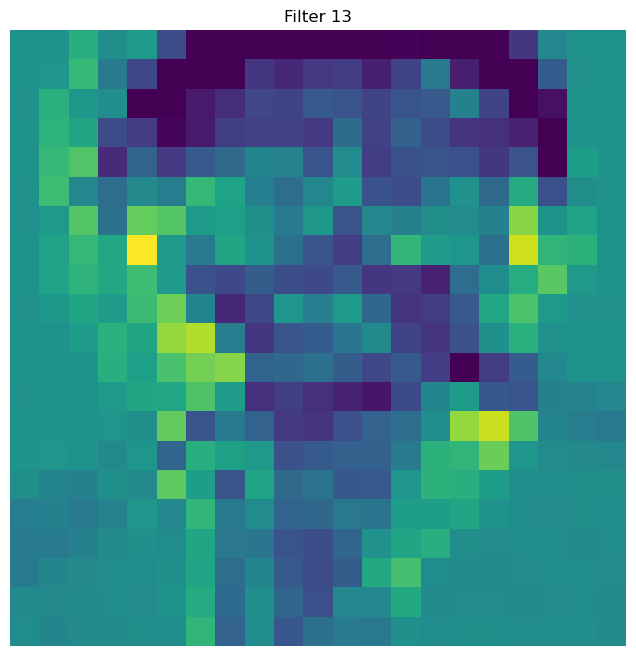

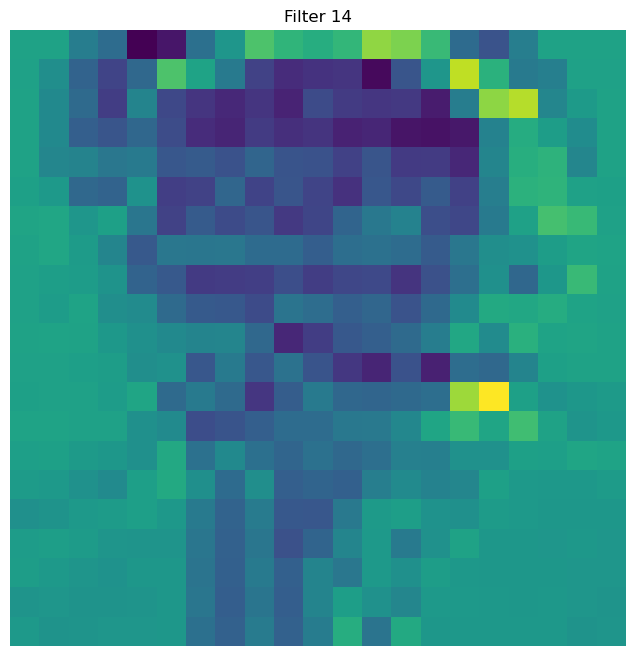

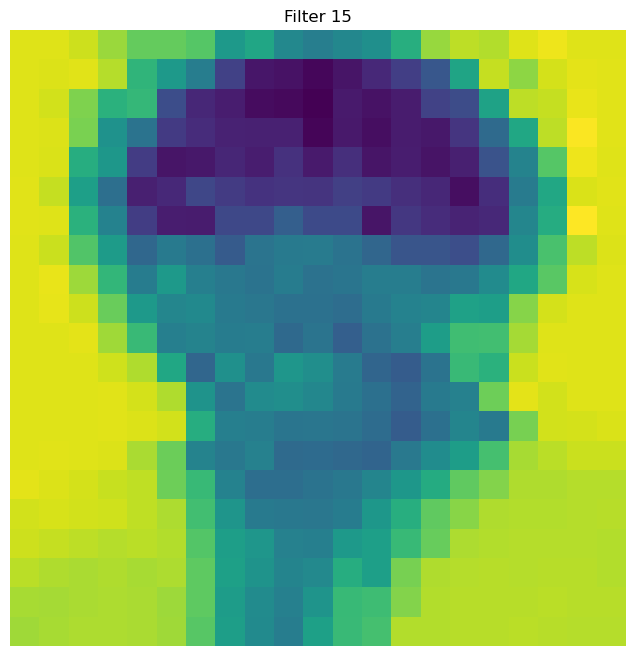

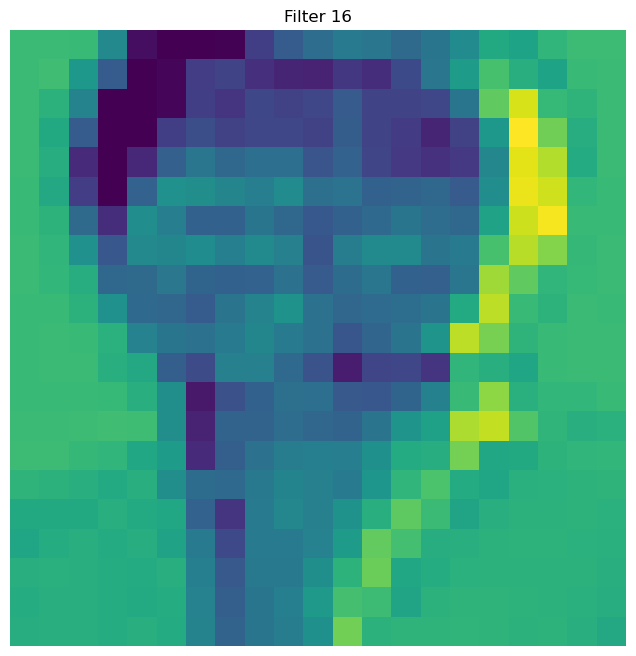

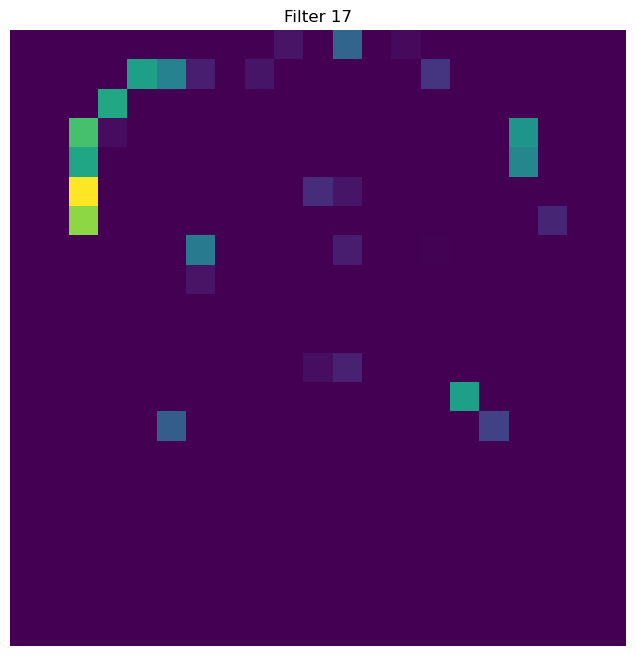

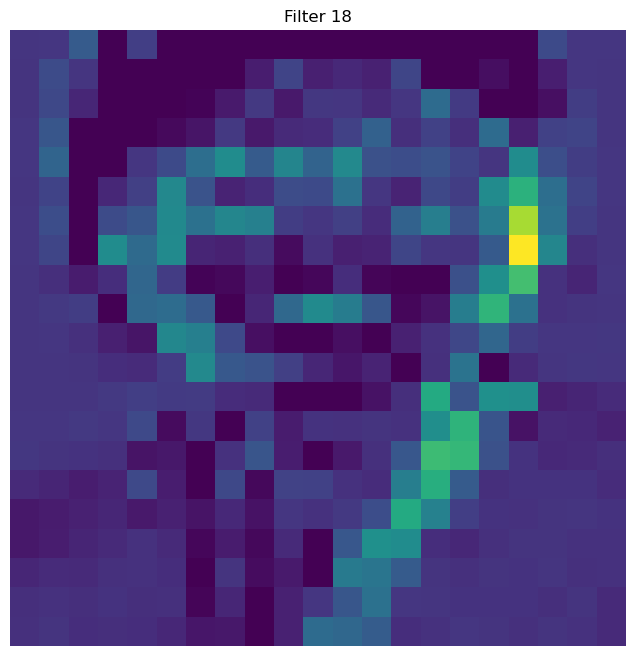

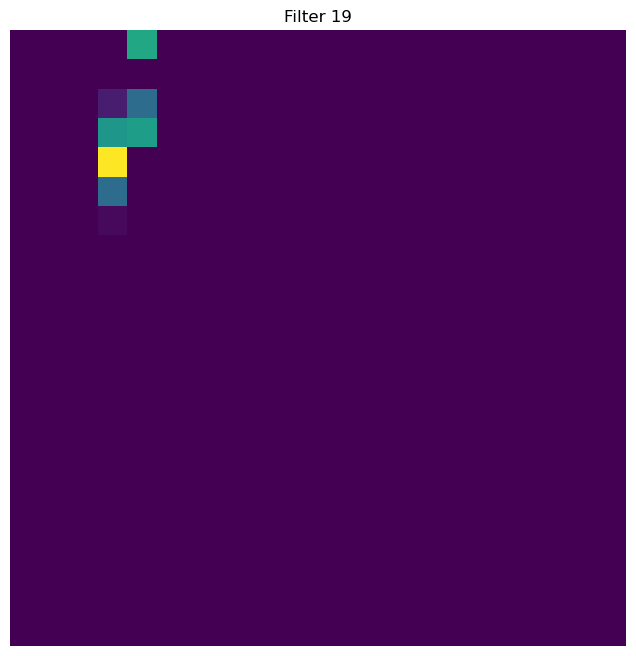

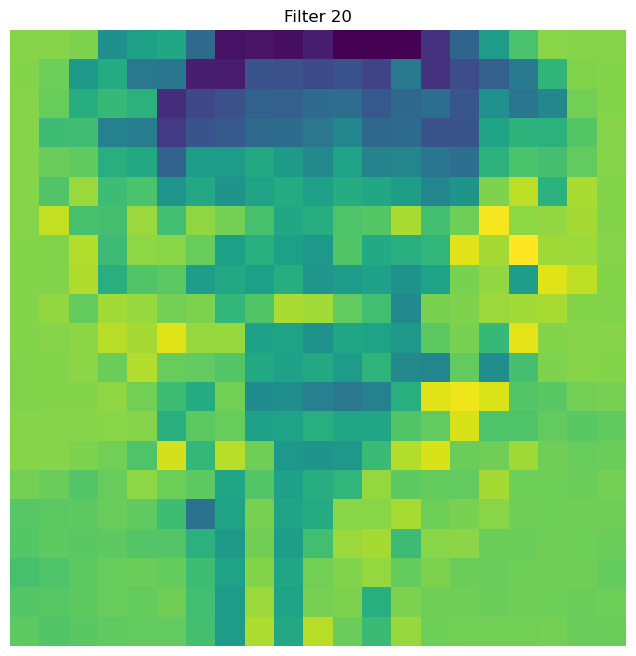

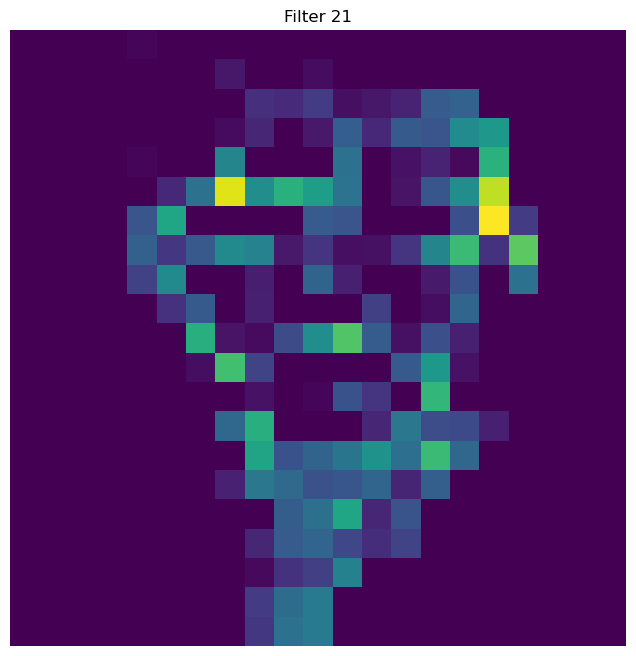

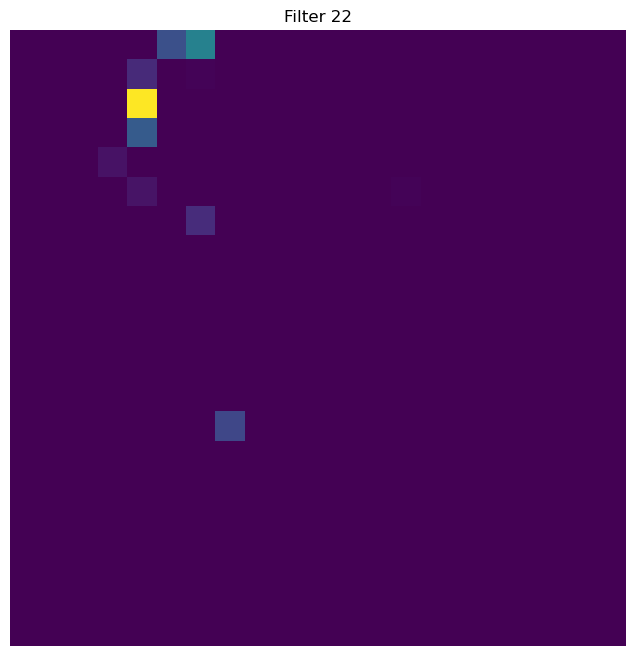

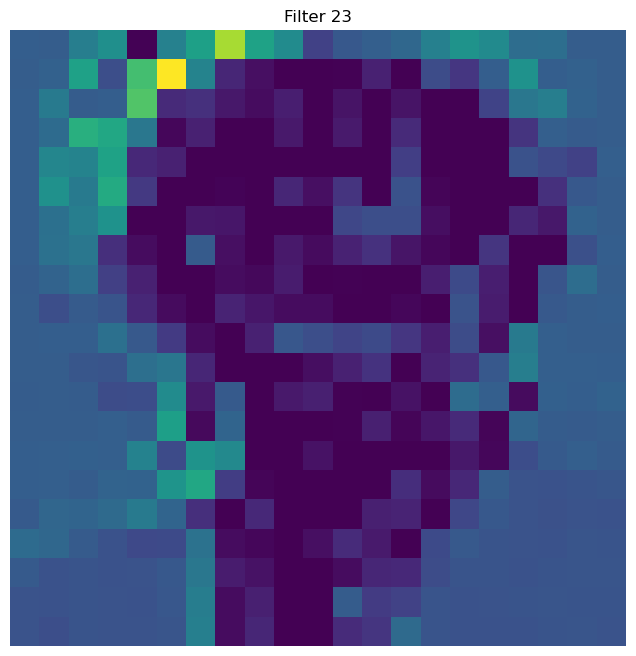

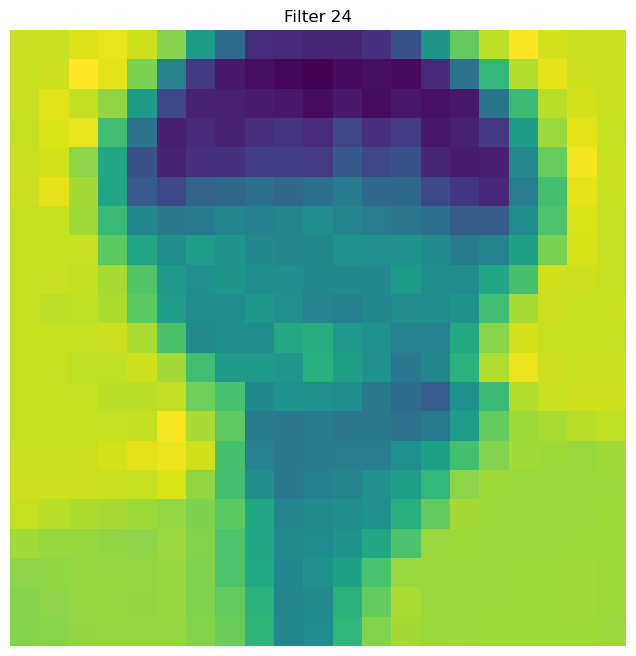

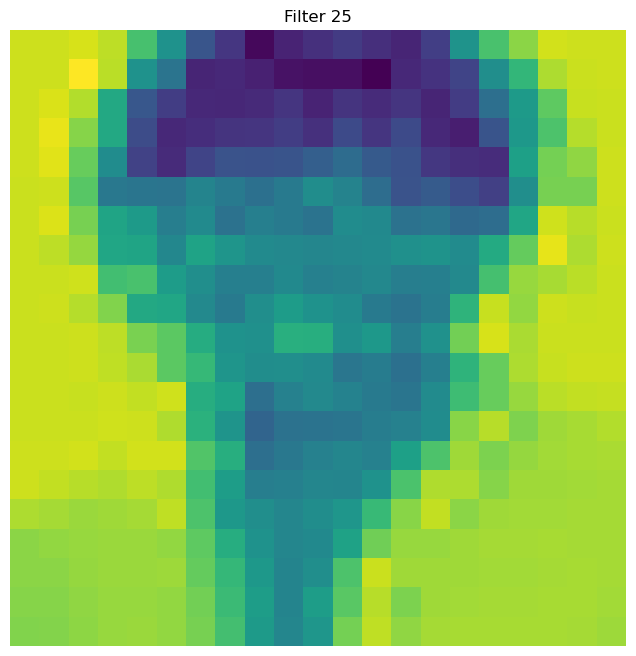

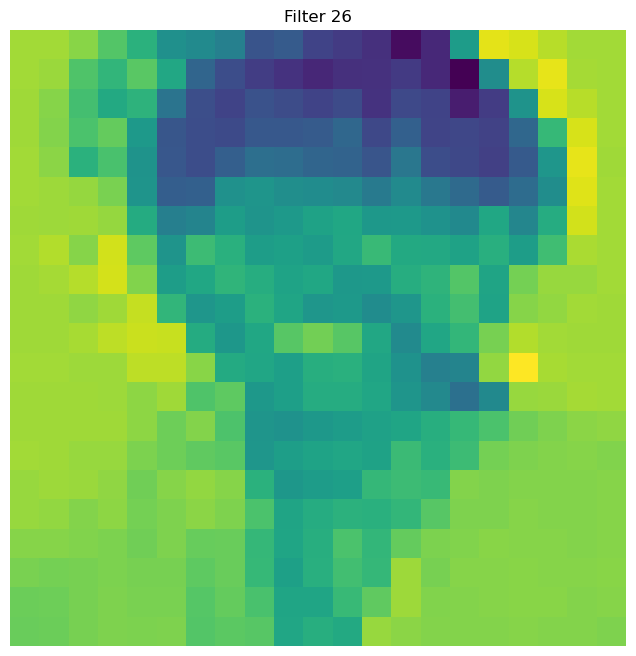

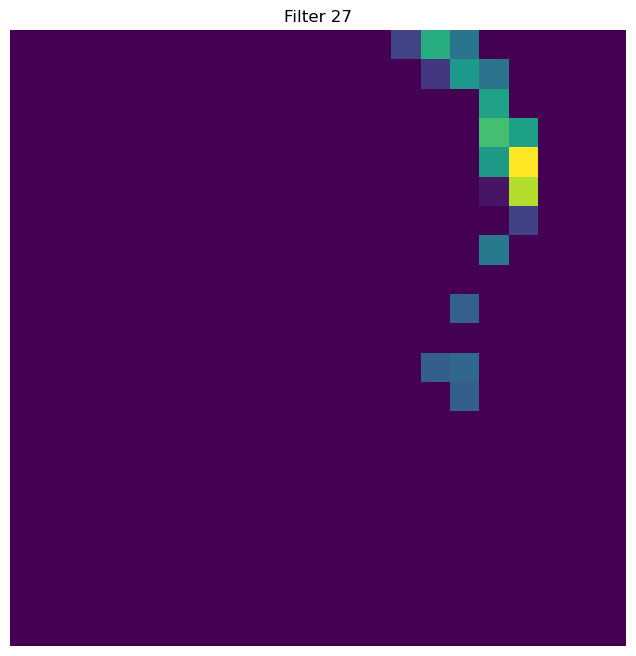

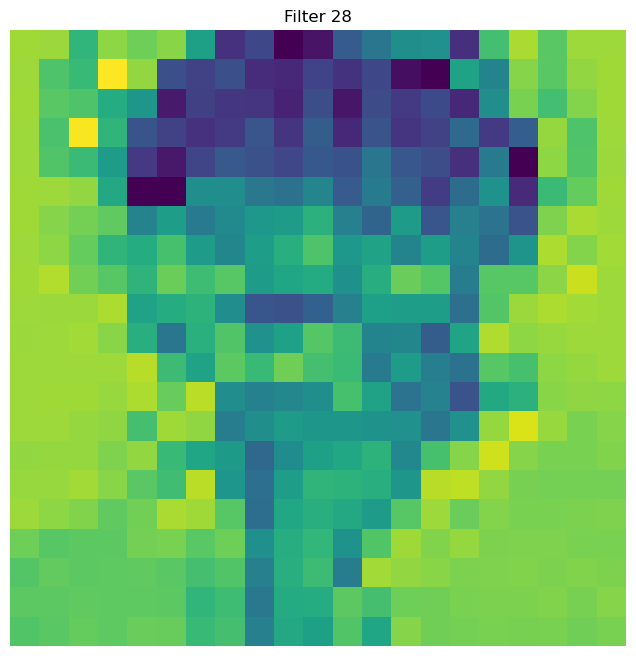

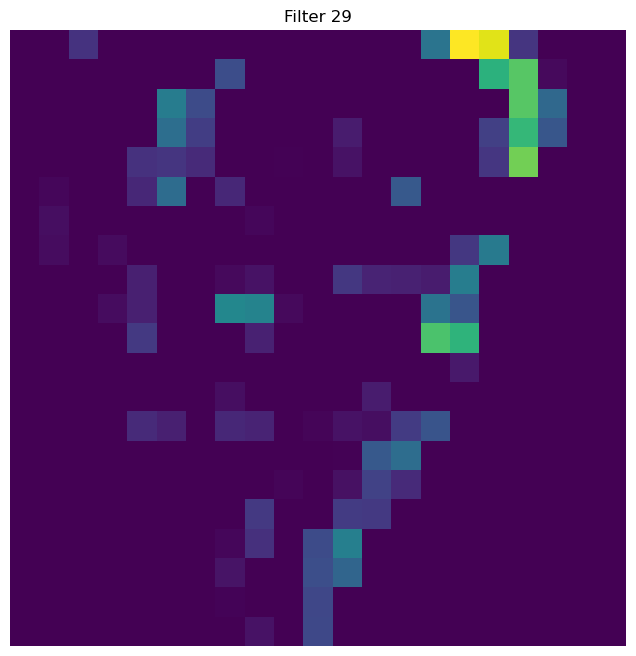

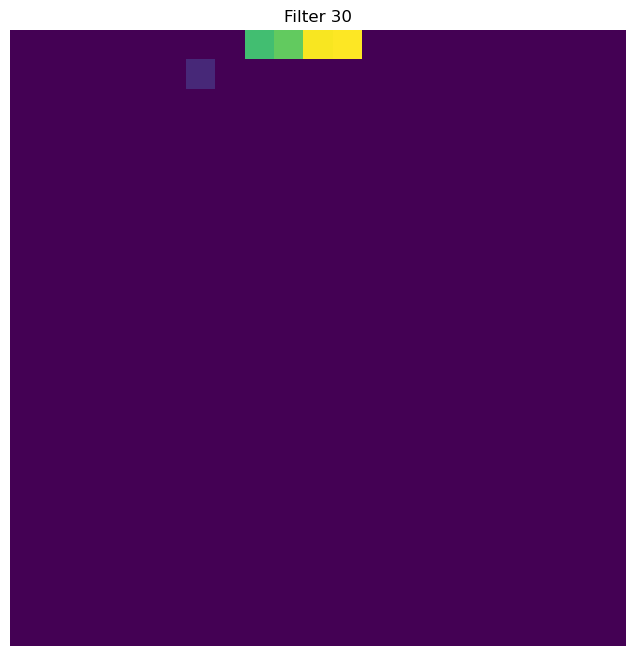

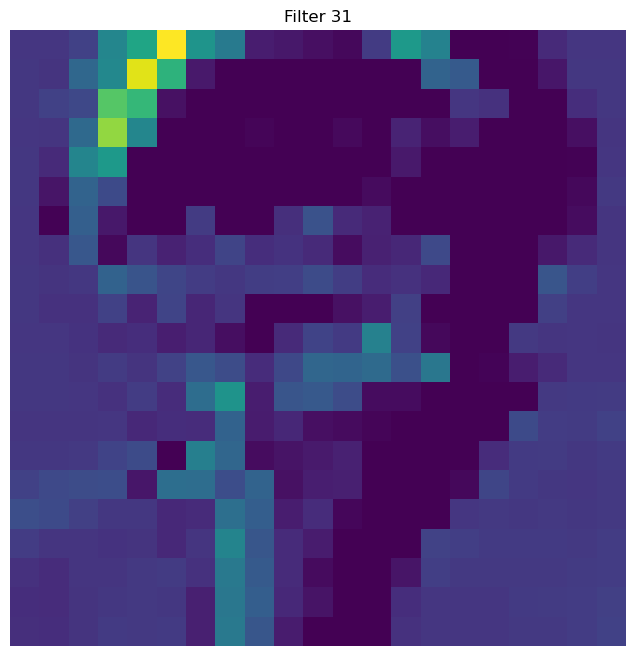

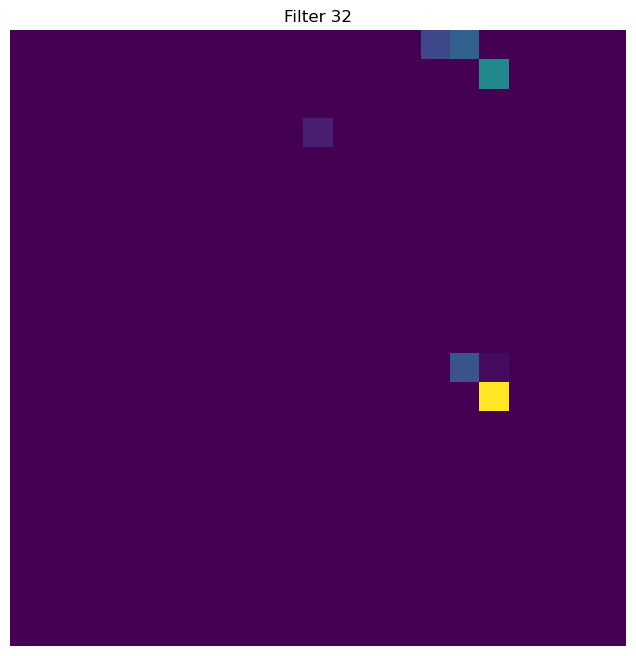

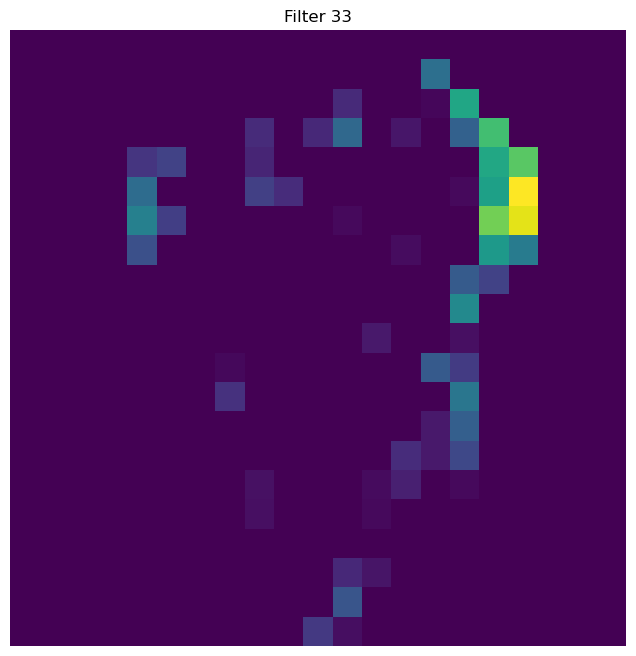

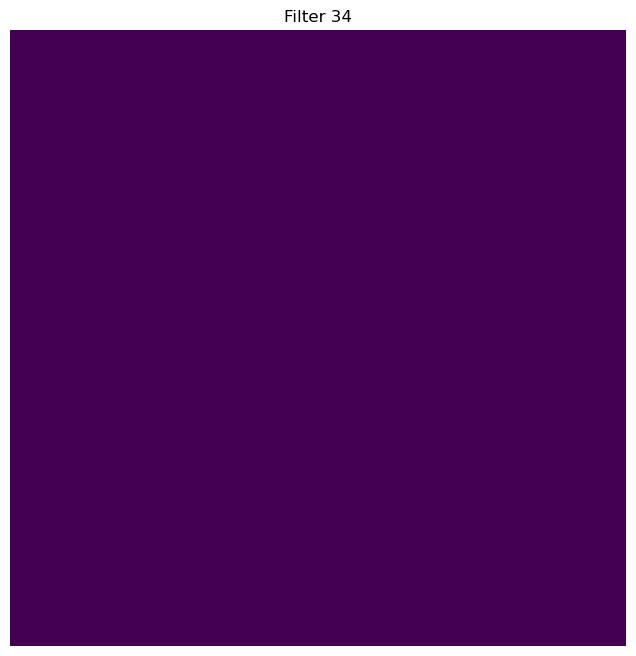

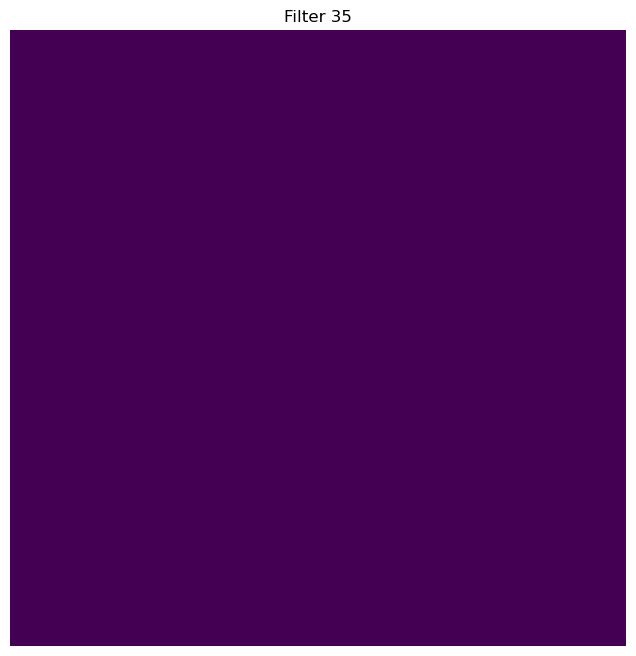

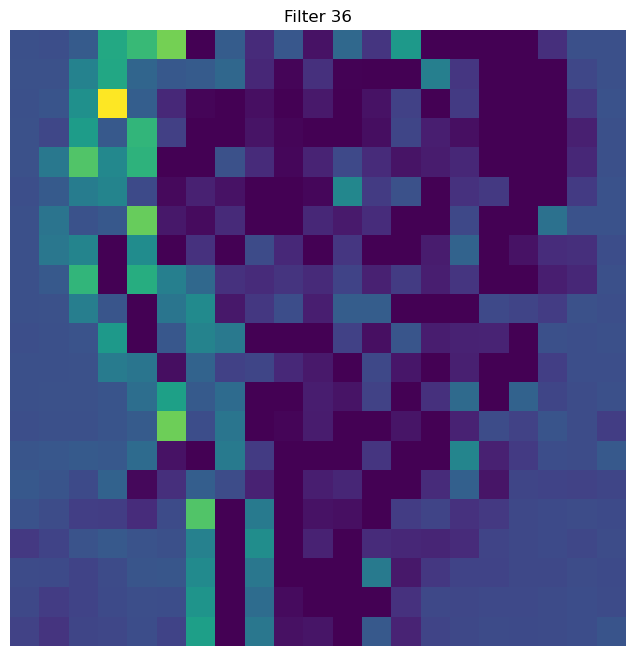

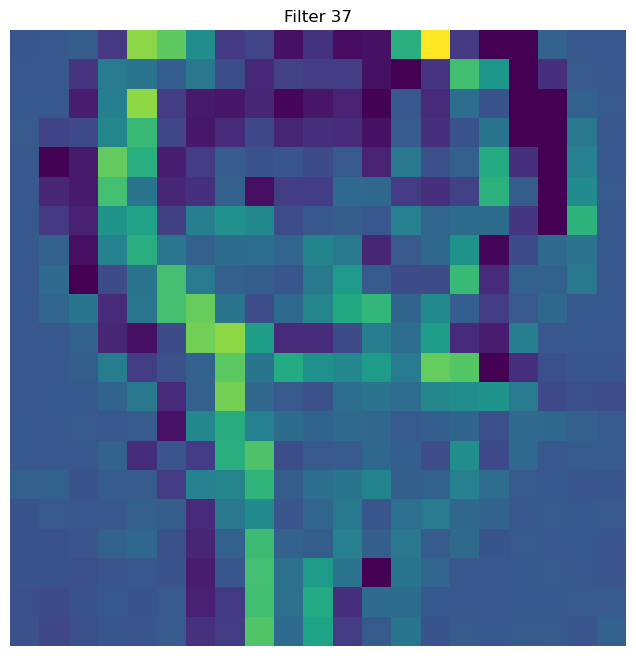

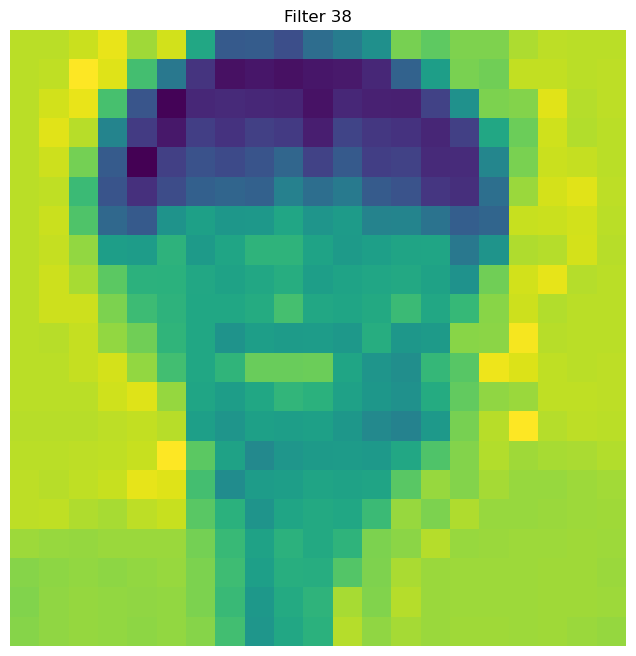

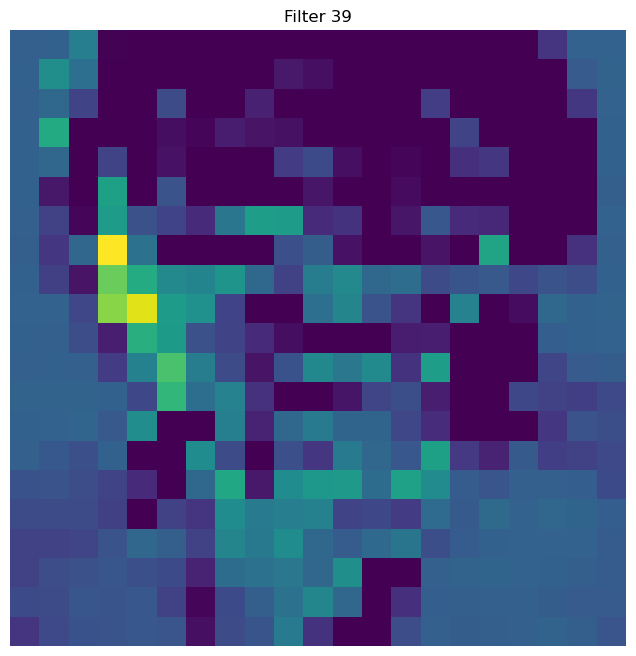

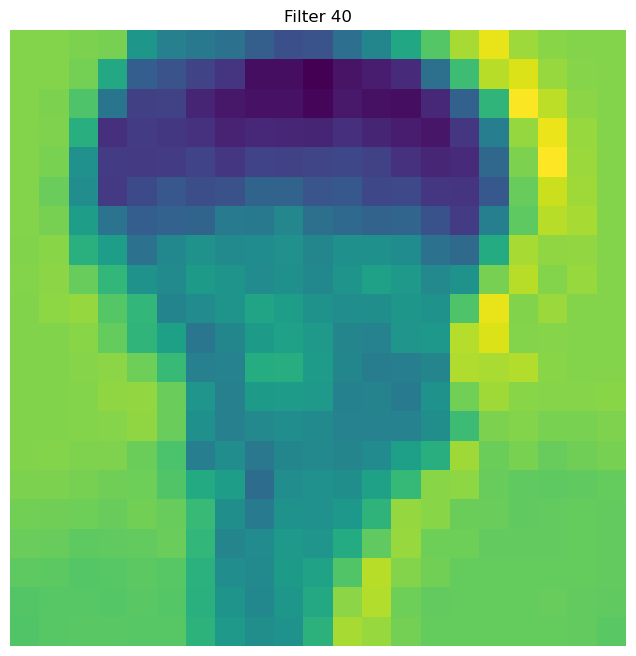

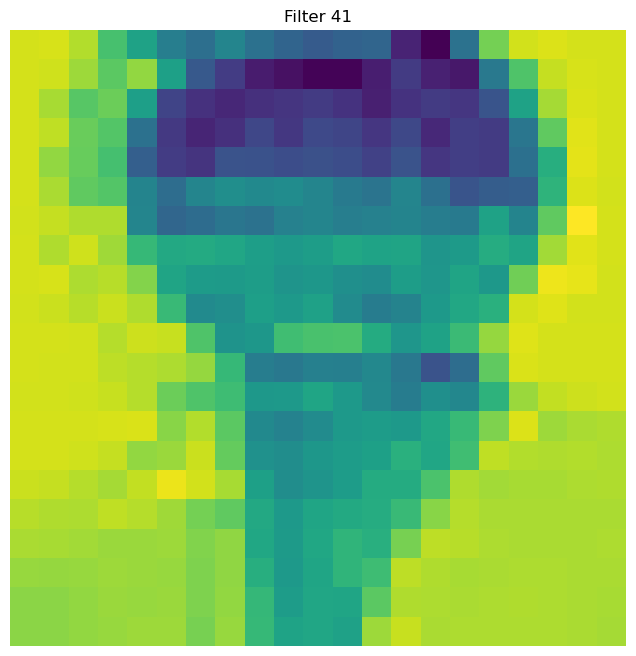

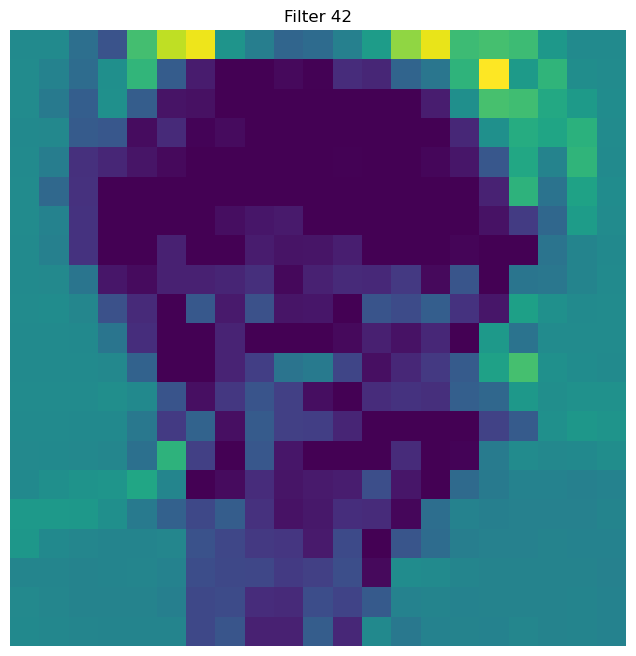

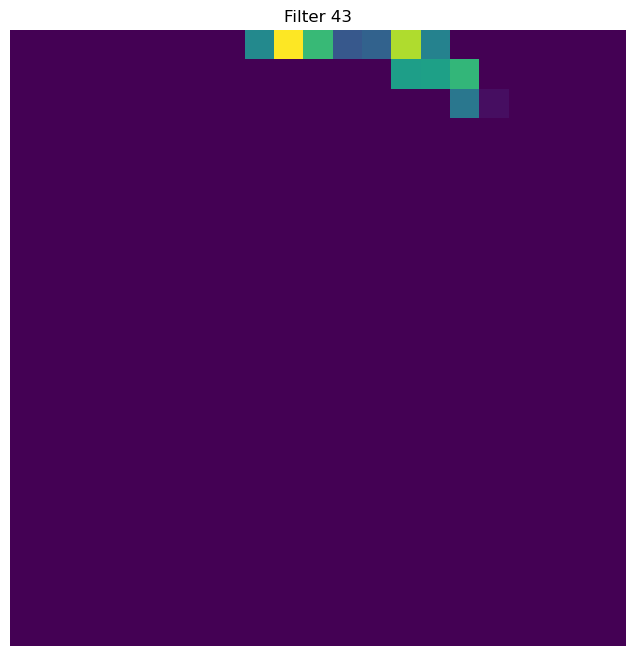

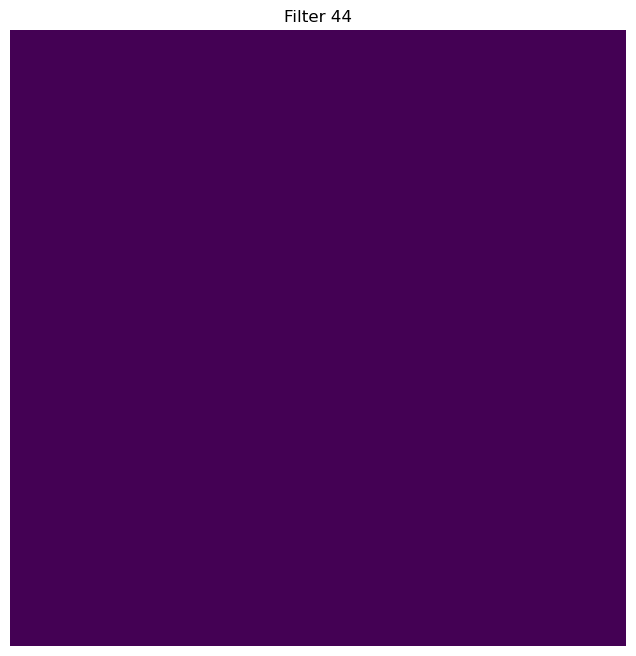

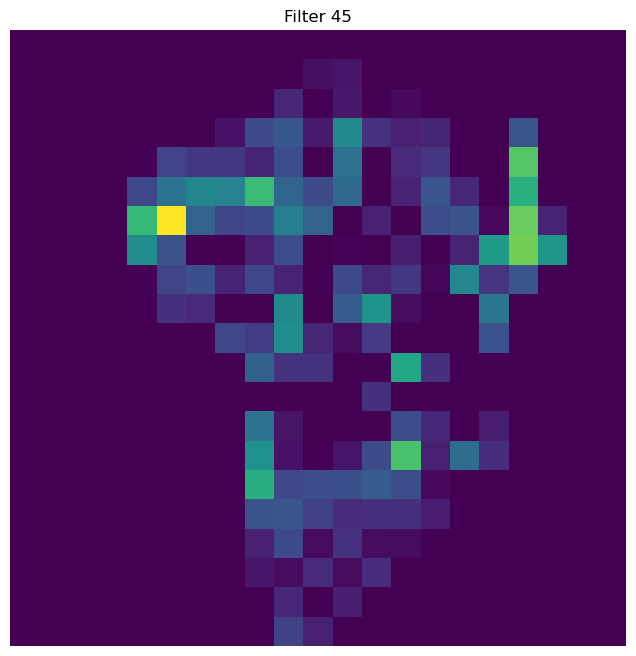

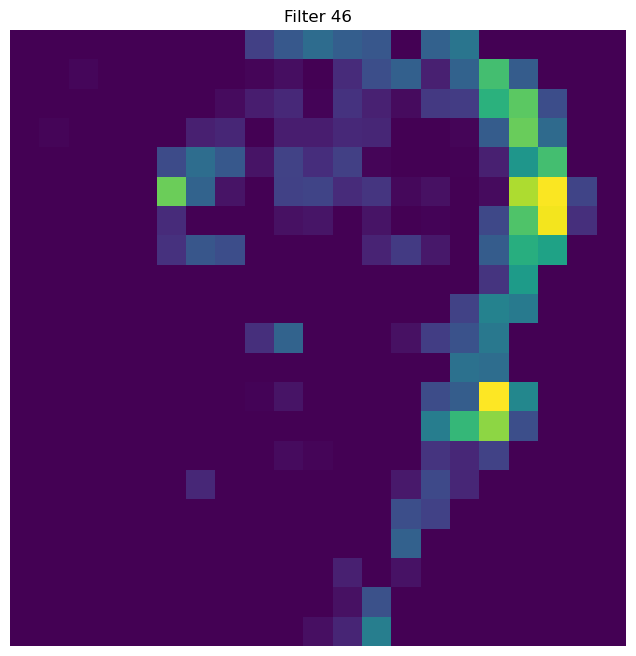

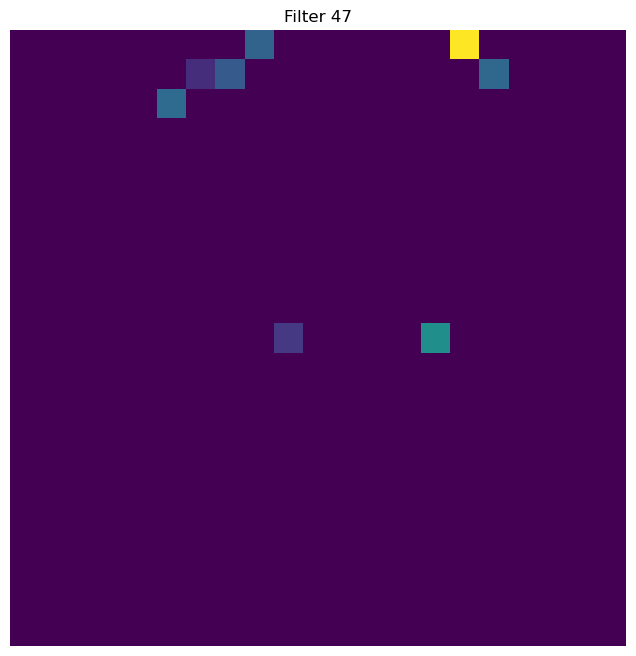

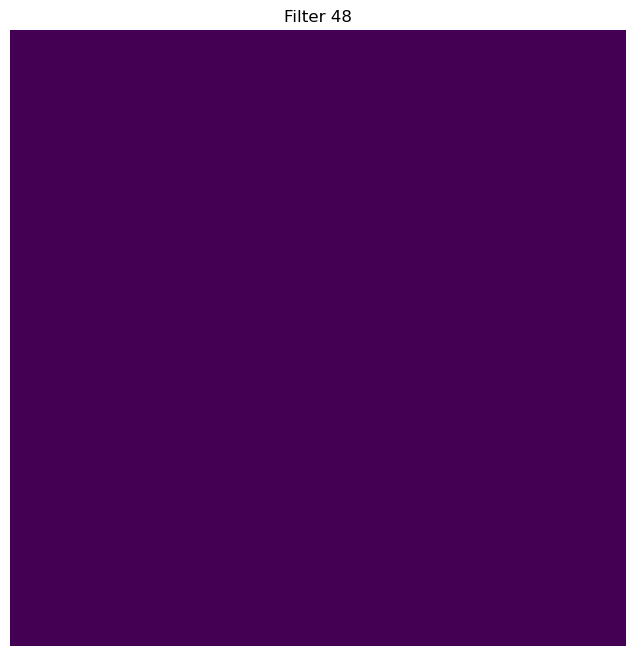

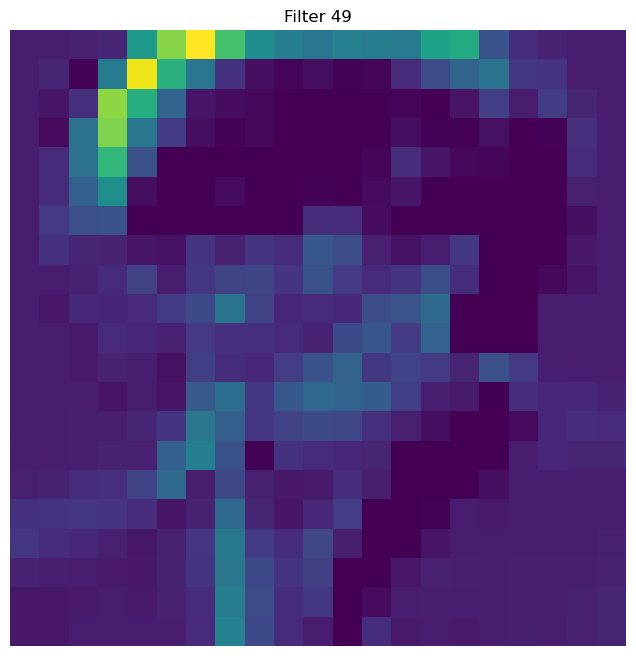

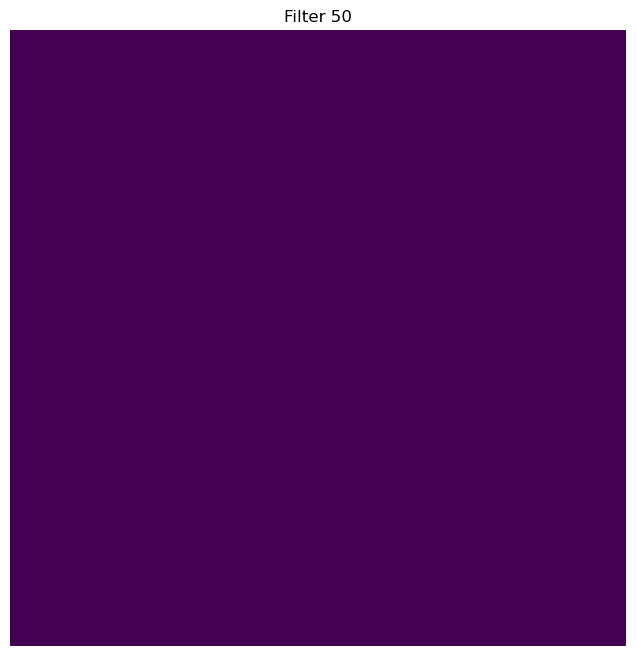

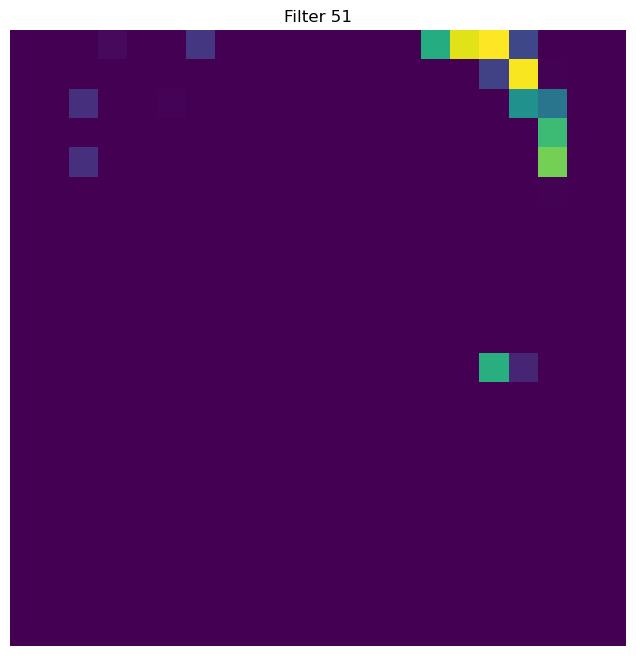

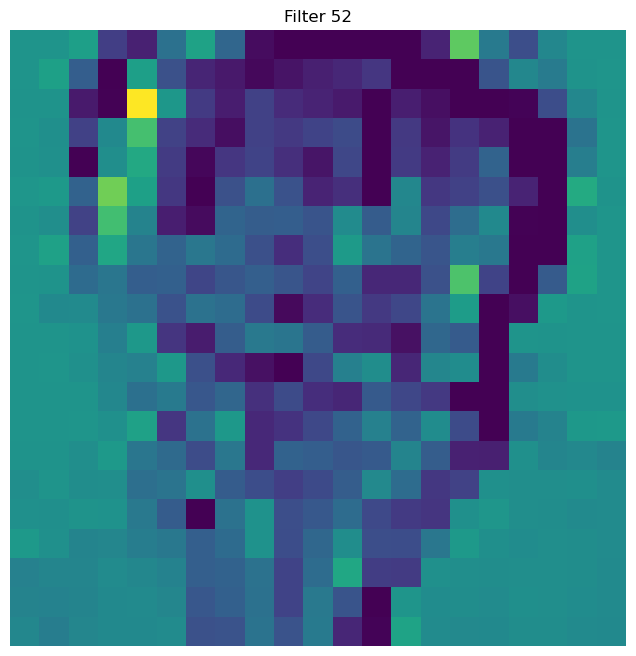

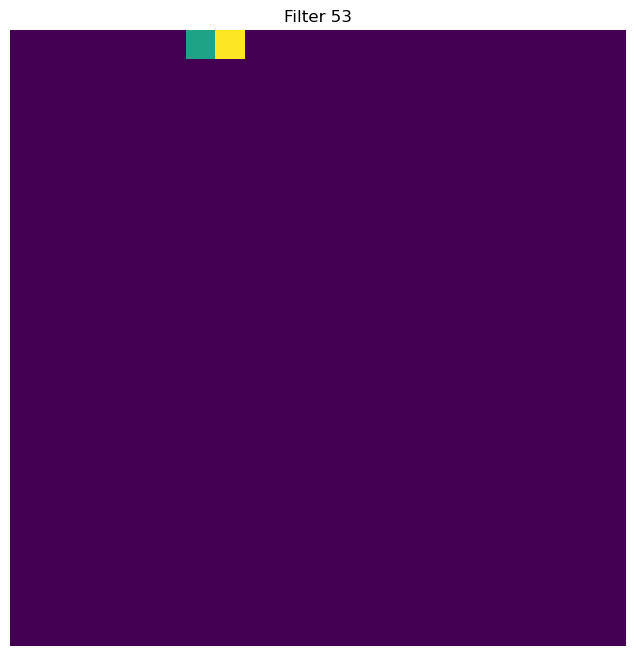

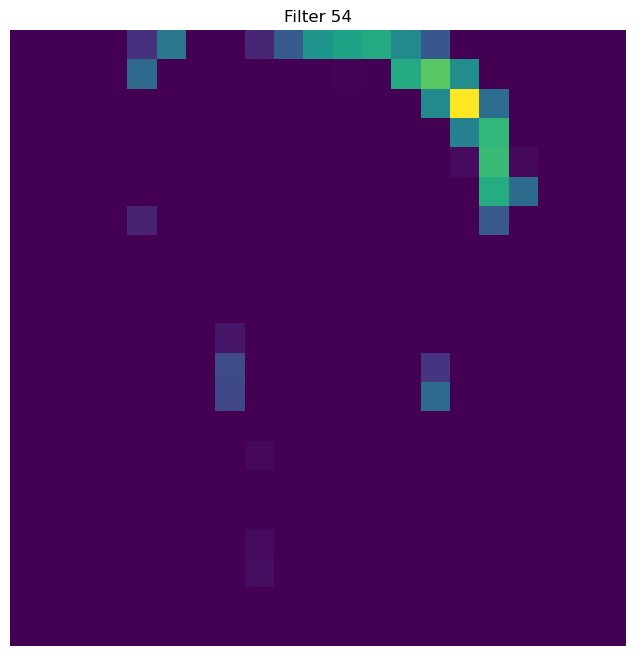

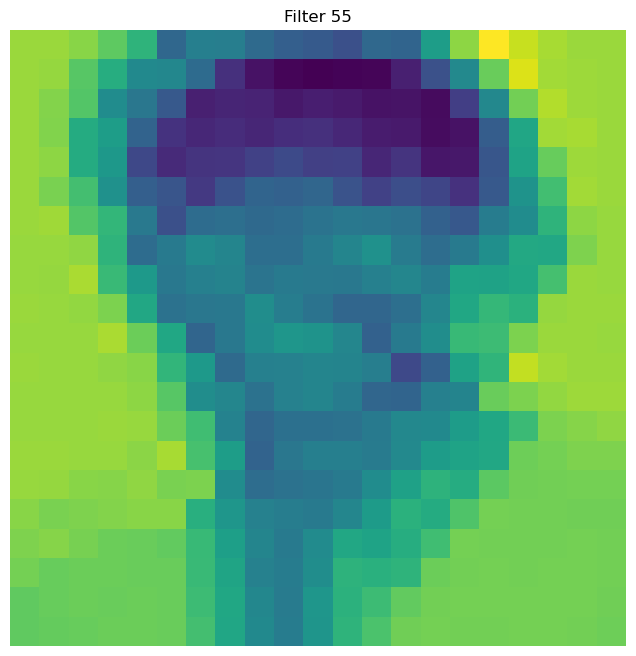

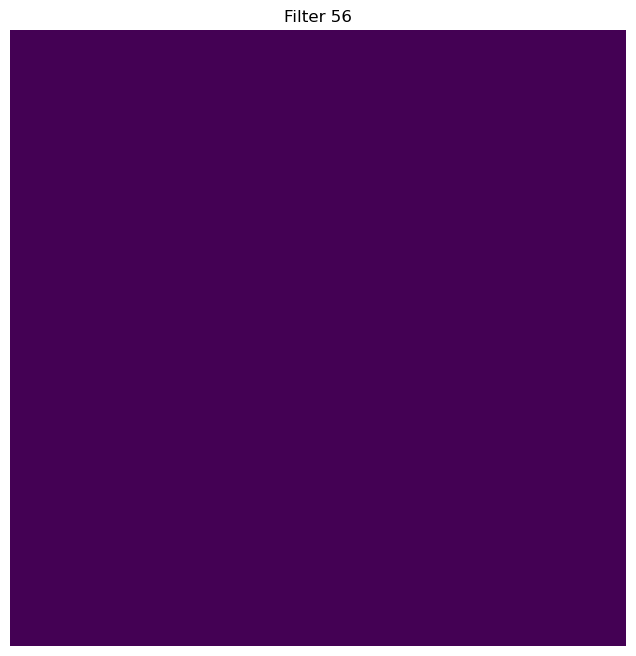

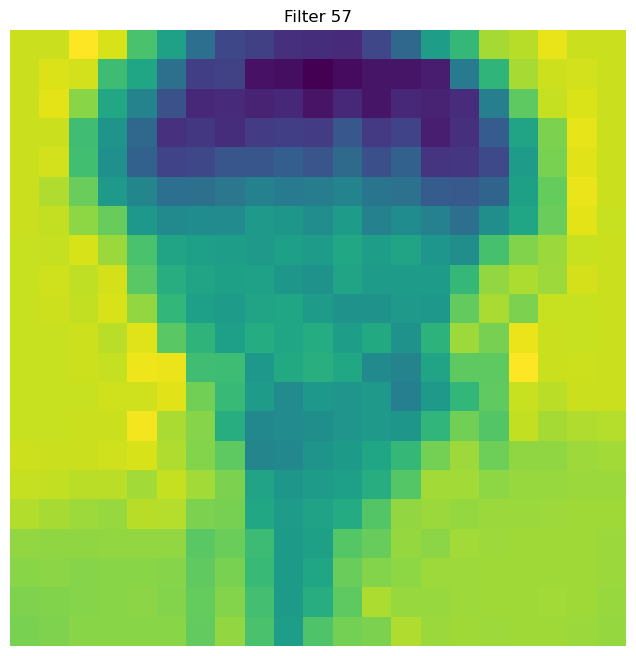

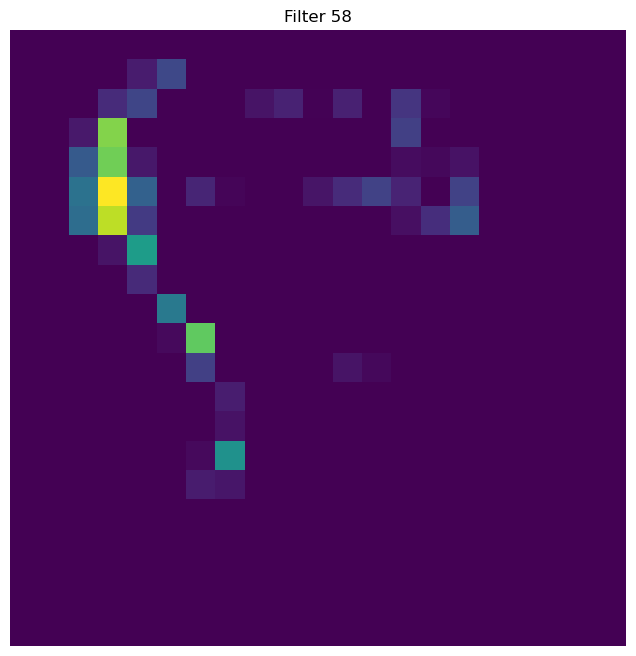

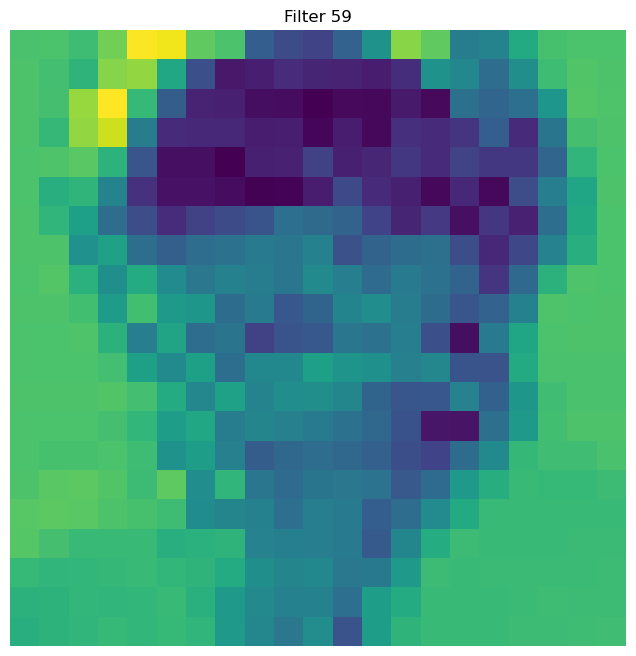

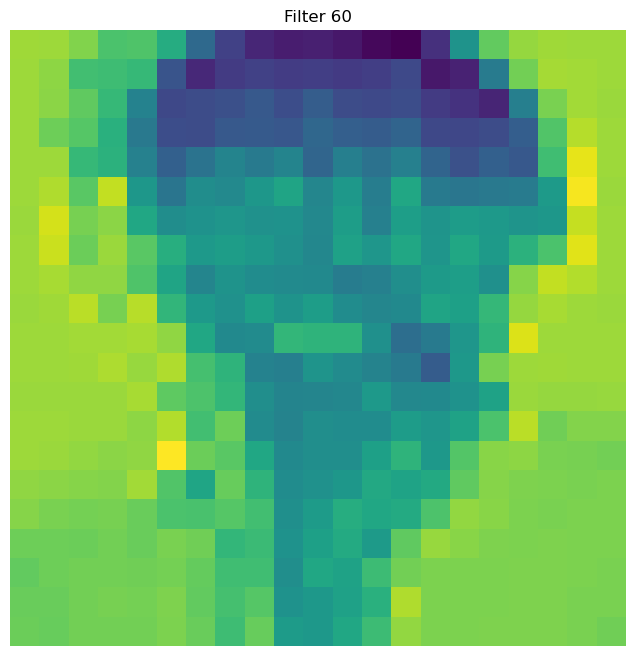

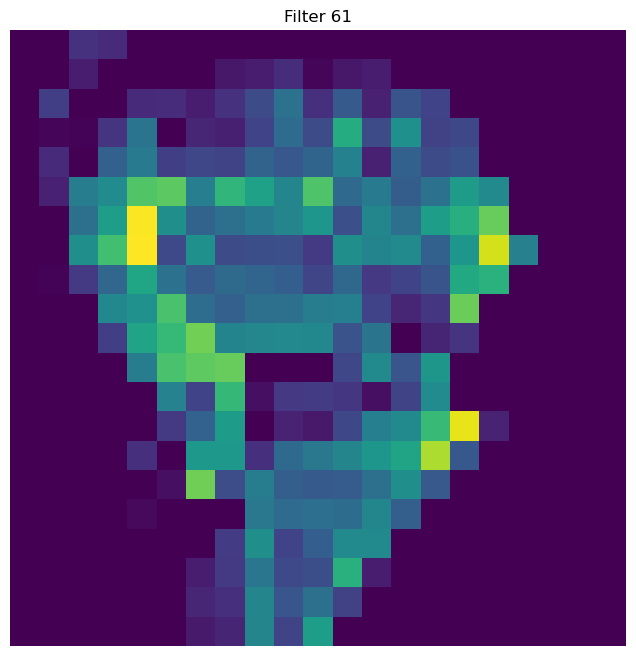

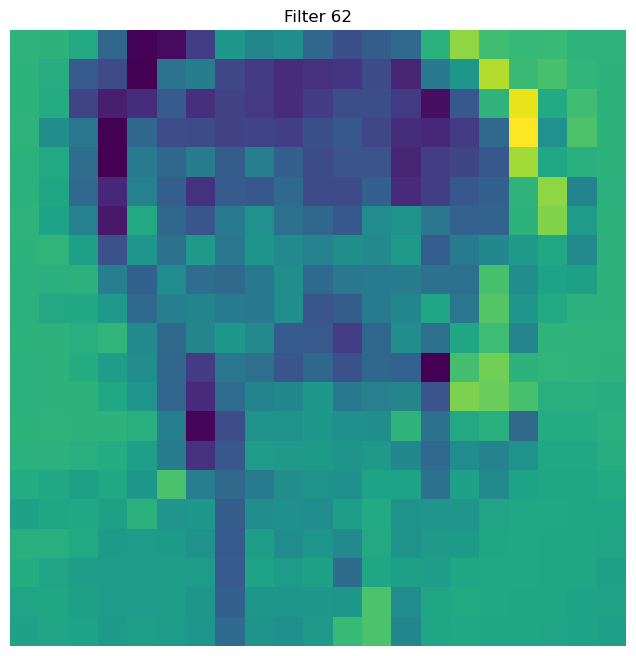

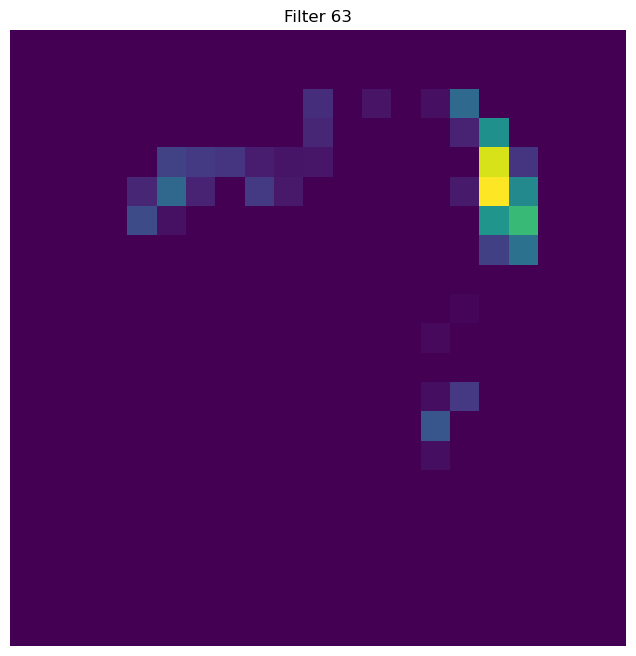

In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3), name='conv2d_1'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', name='conv2d_2'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', name='conv2d_3'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Adjust this to match the number of classes (7)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Build the model to initialize all layers
model.build((None, 48, 48, 3))

# Run a dummy prediction to ensure all components are initialized
model.predict(np.random.random((1, 48, 48, 3)))

# Save the model
model.save('my_pretrained_model.h5')

# Load the model
model = load_model('my_pretrained_model.h5')

# Define a model to extract feature maps from a specific convolutional layer
layer_name = 'conv2d_2'  # Choose the layer you want to visualize

# Ensure the layer exists
layer_names = [layer.name for layer in model.layers]
if layer_name in layer_names:
    intermediate_layer_model = Model(inputs=model.inputs, outputs=model.get_layer(layer_name).output)
else:
    raise ValueError(f"Layer {layer_name} not found in the model.")

# Load and preprocess the test image
img_path = r'C:\Users\shaik\Desktop\lena.jpeg'
try:
    img = load_img(img_path, target_size=(48, 48))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize if required

    # Get feature maps
    feature_maps = intermediate_layer_model.predict(img_array)

    # Verify feature maps shape
    if feature_maps.shape[1:] and feature_maps.shape[-1] > 0:
        # Visualize activation maps
        num_filters = feature_maps.shape[-1]  # Number of filters in the layer
        for i in range(num_filters):
            plt.figure(figsize=(8, 8))
            plt.imshow(feature_maps[0, :, :, i], cmap='viridis')  # Use 'viridis' or 'hot' as needed
            plt.title(f'Filter {i}')
            plt.axis('off')
            plt.show()
    else:
        print("Feature maps have no filters.")
except Exception as e:
    print(f"An error occurred: {e}")


In [ ]:
As we are using relu as activation function for negative value it is 0 so activation map==feature map here